# TASK6 : Prediction using Decision Tree Algorithm

### Create the Decision Tree classifier and visualize it graphically.
### The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
## By:SUMANTH LADE

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

### Get the data

In [2]:
data=pd.read_csv('./Iris.csv')

### Having a look at first 5 rows of our data

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### We do not need Id, so let us drop it.

In [4]:
data.drop('Id',axis=1,inplace=True)

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Species is categorical variable so let us encode it using Label encoder

In [6]:
lb = LabelEncoder()
data["Encoded_species"] = lb.fit_transform(data["Species"])

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


### Let us split our data into training and testing set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:4],data.iloc[:,5], test_size=0.2, random_state=42)

### Fit Our Model to training data

In [9]:
model=DecisionTreeClassifier()
model=model.fit(X_train,y_train)

### Make prediction

In [10]:
y_pred=model.predict(X_test)


### Print confusion matrix and classification report

In [11]:
print(confusion_matrix(y_test, y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Visialize our Decision Tree Graphically

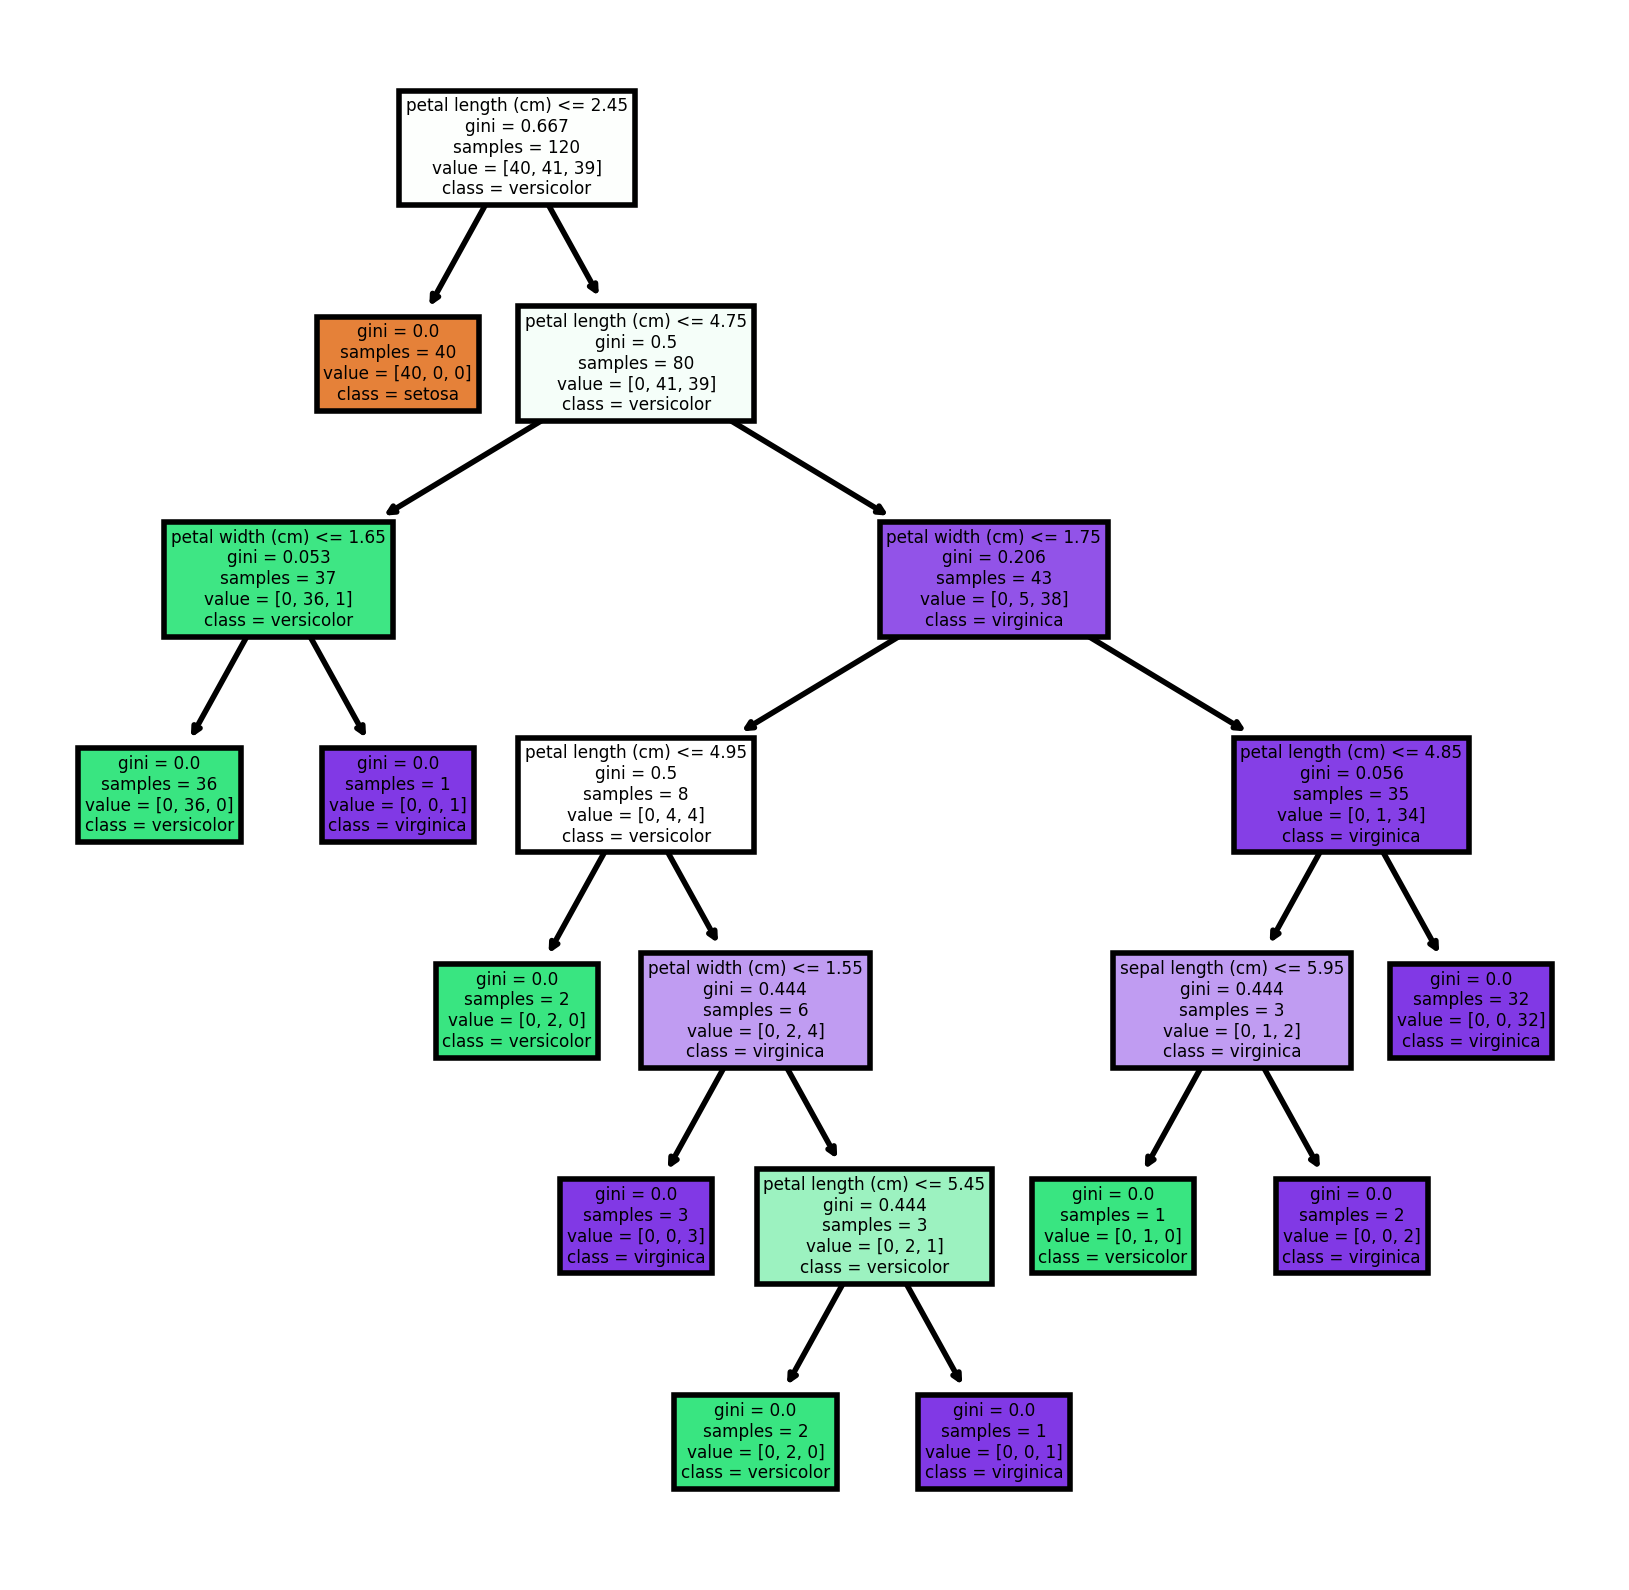

In [13]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=400)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Let us predict using some random values

In [14]:
pred=model.predict(pd.DataFrame(np.array([[5,4,1.5,0.5]])))[0]

In [15]:
print(cn[pred])

setosa
